## **Introduction to Adaptive Boosting: Advantages & Disadvantages Compared to Popular Bagging Methods Like Random Forest**

## I. The Mathematical Background of Decision Tree, Boosting, And Bagging

### 1. Background


Decision tree is a very popular machine learning method. It stratifies or segments the prediction space into simple regions, and predicts using a statistic of each region. Basic trees, such as a tree with only one level, do not learn the data very well. However, by combining decision trees with other techniques such as boosting and bootstraping, we can build advanced tree models that captures the true data.

In this tutorial we will look at two widely-used tree models - Adaptive Boosting (Adaboost) and Random Forest. Both are ensembled methods, as both of them construct multiple simple trees and then aggregate them to yield better results. We are interested in seeing how the two models behave in different types of data.


### 2. Decision Tree
A decision tree can be easily understood figuratively, consider the toy dataset
\begin{array}{|c|c|}
\hline GPA & 413grade \\\hline
  3.8 & A \\\hline
  3.9 & A \\\hline
  3.4 & B \\\hline
  3.3 & B \\\hline
\end{array}

If we would like to fit a tree to predict a student's grade in Stat 413 given their GPA, our tree might look like

<img src="https://drive.google.com/uc?id=1u-AcoF6d6o_3fKo1JC_rzmb8O3dlSd1X">

If a student's $GPA<3.5$, the tree will predict a B as the student's grade in stat413; if their $GPA\geq 3.5$, the tree will predict an "A" as the grade. 

When we have more predictor variables, our tree can get very complicated, like this one here:
<img src="https://drive.google.com/uc?id=1u0cw5r7xZQR11OH6cpZbXiFUkdoNJPyU">

We can make our a tree arbitrarily deep to reduce its bias. However, a deeper tree has more variance and is vulnerable to overfitting. 

A typical way to reduce variance is through averaging. Let $X_1, X_2, \cdots, X_n \overset{iid}{\sim} (\mu, \sigma^2)$, and let $\bar{X}$ be the mean of $X_1, X_2, \cdots, X_n$ then 

\begin{align}
\mathbb{E}(\bar{X}) &= mu \\
Var(\bar{X}) &= Var\left(\frac{1}{n}\sum_{i=1}^{n} X_i\right) \\
&=  \frac{1}{n^2}\sum_{i=1}^{n}Var(X_i)  && \text{iid $X_i$}\\
&=  \frac{1}{n^2}n\sigma\\
&=  \frac{\sigma}{n}\\
\end{align}

We see that $\bar{X}$, the mean of a set trees, has smaller variance than any single tree itself. We will see how Adaboost and Random Forest both use this idea to improve upon decision trees.

### 3. Adaboost
Adaboost constructs many shallow trees, usually stumps (one level trees), sequentially. Each tree fixes the residuals left by the previous tree. The final model is a weighted average of these trees based on their error rates.

Assume we have n observations $Y=y_1\cdots y_n$ and m variables $X^1\cdots X^m$ . Adaboost starts by giving each sample the same sample weight, $w_1=w_2=\cdots=w_n=\frac{1}{n}$. Then it fits a stump that gives the lowest training erorr. Suppose this stump uses predictor $X^j$. Denote this stump as $G_j(X)$. The algorithm then calculates the weighted errors of $G_j(X)$:
$$
Err_j = \frac{\sum_{i=1}^{n}w_iI(G_j(x_i)\neq y_i)}{\sum_{i=1}^{n}w_i}
$$ where $I(G_j(x_i)\neq y_i)=1$ if $G_j(x_i)\neq y_i$ and $0$ otherwise.

The algorithm then caculates $\alpha_j$, which is the weight of the tree $G_j(X)$ in the final model:
$$
\alpha_j = \log({\frac{1-Err_j}{Err_j}})
$$

The algorithm then uses $\alpha_j$ to update the sample weights $w_1\cdots w_n$:
$$
w_i = w_i\cdot exp(\alpha_jI(G_j(x_i)\neq y_i)),\ 1\leq i\leq n
$$

The algorithm then repeat the above steps using other predictors $X^1\cdots X^{j-1} X^{j+1}\cdots X^m$.

The final model is a weighted average of the stumps
$$
G(X) = \sum_{j=1}^{m} \alpha_j G_j(X)
$$

###  4. Random Forest

In section I.2, we see that the variance of $\bar{X}$ is smaller than the variance of $X$. We can extend this idea to trees but diving our data into $B$ $\textbf{independent}$ subsets. We then fit a separate tree, $\hat{f}^1(X), \cdots, \hat{f}^B(X)$, for each subset of the data, then take the average of these trees as final model output:

\begin{align}
\hat{f}_{avg} = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(X)\\
\end{align}

As we saw previously, $Var(\hat{f}_{avg}) = \frac{1}{B} \hat{f}^b(X)$, where $1\leq b\leq B$. 

However, in practice we typically don't have enough data to split into subsets. We use an approximation of the above schema by taking $B$ bootstrap samples, and training a separate tree, $\hat{f}^{*1}(X), \cdots, \hat{f}^{*B}(X)$  on each bootstrap sample.
Agin, we take the average of these trees to get the output of our model:
\begin{align}
\hat{f}^{*}_{avg} = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^{*b}(X)\\
\end{align}

If the trees, $\hat{f}^{*1}(X), \cdots, \hat{f}^{*B}(X)$ are independent, then the variance of our model is siginificantly reduced to $\frac{1}{B}$ of the variance of a single tree. But if the trees are not independent, then we need to add their covariances to the variance of the mean, increasing the variance of our model. 

In practice, correlations among trees are very common. Imagain we have a dataset with $n$ variables, it is likey that $m<n$ variables are more significant than the rest. Thus most of the trees,  $\hat{f}^{*1}(X), \cdots, \hat{f}^{*B}(X)$, will look very similar, as most of them will use the significant variables to grow the tree.  

Random Forest tries to remove these correlations. If each tree, $\hat{f}^{*1}(X), \cdots, \hat{f}^{*B}(X)$, uses a random subset of the variables, then it is less likey that all the trees are using the same set of strong variables, effectively reducing the correlations between the trees.

## II. Simulation Using Adaboost & Random Forest

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In this section, we will show multiple examples of applying Adaboost and Random Forest on simulated data. Through the examples, you are able to see both the advantages and disadvantages of Adaboost, as well as the comparison between Adaboost and Random Forest so that it gives you a better idea on how and when you should use these boosting/bagging algorithms. 

### 1. Adaboost Simulation

#### i. Simple Data with Some Noise

Firstly, let's generate a very simple dataset with only **20 observations and 3 variables** using the make_classification function from the famous Python machine learning package called Scikit-learn. This function "initially creates clusters of points normally distributed (std=1), introduces interdependence between these features, and adds various types of further noise to the data" according to the Scikit-learn API. In this simulated dataset, all the variables/predictors are informative, and we add a parameter called "flip_y" that adds additional noise to the data by randomly assigning classes to parts of the observations. The first several rows of the data are shown below: 

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 20,    # 20 observations
               n_features = 3,    # 3 variables/predictors
               n_informative = 3, 
               n_redundant = 0, 
               random_state = 1, 
               flip_y = 0.2)     # 20% of the observations will be assigned to the 2 classes randomly



df = pd.DataFrame(X, columns = ['Var 1', 'Var 2', 'Var 3'])

df["Label"] = y

df.head()

,Var 1,Var 2,Var 3,Label
0,-2.222209,1.700067,0.701864,1
1,-1.289893,0.483748,-0.540642,0
2,-1.991909,-0.091283,0.554954,1
3,-0.215751,1.629769,-0.361200,1
4,1.430633,1.484343,0.347305,0


Now, we will plot the 20 observations. Let's pick 2 of the 3 predictors each time and see if it is very easy to separate the two classes.

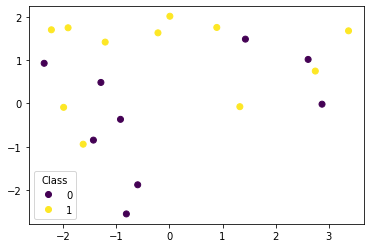

In [ ]:
plot1 = plt.scatter(df['Var 1'], df['Var 2'], c = df['Label'])

plt.legend(handles = plot1.legend_elements()[0], 
           title = "Class",
           labels = ['0', '1'])

plt.show()

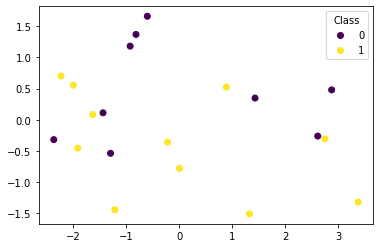

In [ ]:
plot2 = plt.scatter(df['Var 1'], df['Var 3'], c = df['Label'])

plt.legend(handles = plot2.legend_elements()[0], 
           title = "Class",
           labels = ['0', '1'])

plt.show()

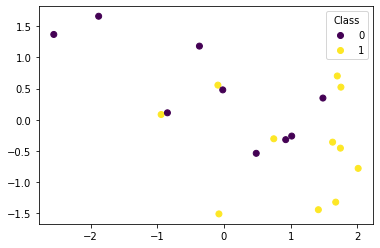

In [ ]:
plot3 = plt.scatter(df['Var 2'], df['Var 3'], c = df['Label'])

plt.legend(handles = plot3.legend_elements()[0], 
           title = "Class",
           labels = ['0', '1'])

plt.show()

As you can see from the plots, it is not easy to draw a decision tree with only one or two stumps in order to correctly classify all the observations because of the random noise in the data. Let's first try to use Decision Tree to fit a model using default parameters; then, we will use the **AdaBoostClassifier** module from scikit-learn again to fit an Adaboost model on this simulated data. According to the Director of Machine Learning of Wikimedia Foundation, Chris Albon, the three most important parameters for Adaboost are **base_estimator, n_estimators, and learning_rate**. 

<br>

Here, **"base_estimator"** is the weak learner we want to use when we train the model. The default weak learner is a Decision Tree, which is the most commonly used learner in Adaboost. As we are going to compare the performances between Adaboost and Random Forest later in the section, we will continue using the default value called DecisionTreeClassifier. 

<br>

**"n_estimators"** is probably the most important parameter, and can be tuned using different values. It is essentially the number of Decision Tree models we want to train iteratively. As the trees are growing successively, Adaboost will upweight the incorrectly classified data in the previous round and downweight the others for each iteration.

<br>

**"learning_rate"** is the "contribution" of each weak learner to the weights, according to Albon. It is set to 1 as the default value, but we can reduce the learning rate to increase the training time and potentially yield better performances in return. 

<br>

Now, let's fit the models on the simulated dataset and compare. Let's randomly split the data into training set and test set, where the training set has 80% of the original data (16 observations, in this case), and the test set has the rest of 20%.    

In [ ]:
predictor = df[['Var 1', 'Var 2', 'Var 3']]

response = df['Label']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(predictor, response, train_size = 0.8, random_state = 1, stratify = y)

By setting **stratify = y**, we ensure that the distributions of the two classes are the same in our training set and test set. Now, let's fit a Decision Tree model using default parameters and an Adaboost model on the training set, then evaluate the model performances on the test set:   

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(train_x, train_y)

dt_model.score(train_x, train_y)

1.0

In [ ]:
dt_model.score(test_x, test_y)

1.0

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators = 5, learning_rate = 1)

adaboost_model.fit(train_x, train_y)

adaboost_model.score(train_x, train_y)

1.0

In [ ]:
adaboost_model.score(test_x, test_y)

1.0

From the results above, we can see that even a weak learner like the default Decision Tree model can have a great performance on simple data (although with some noise) since the accuracy score is 1.0, meaning that it correctly predicts all the classes of the observations in the test set. Here we use n_estimator = 5 in the Adaboost model (so that it fits 5 trees each with 1 stump and makes final prediction based on the weighted value of these trees), and it is more than enough to reach the 100% accuracy score.

<br>

Hence, it looks like Adaboost is not necessary in very simple and small datasets. But what about large datasets? Let's first examine its performance on large dataset with noise and dataset with many outliers.

#### ii. Large Dataset with Noise

Let's use a larger dataset for simulation: we will still use the make_classification function from Scikit-learn, but this time we will draw 1000 random samples with 20 informative predictors and the same amount of noise, where 20% of the observations will be assigned to one of the two classes randomly. As we did in the last simulation, we will split 80% of the data into training set, and the rest of them into test set. 

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000,    # 1000 observations
               n_features = 20,    # 20 variables/predictors
               n_informative = 20, 
               n_redundant = 0,
               random_state = 1, 
               flip_y = 0.2)     # 20% of the observations will be assigned to the 2 classes randomly


We will still use the default Decision Tree model for comparison. The **random_state** parameter is only used for controlling the randomness, so that we will not get different trees each time we fit the data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, stratify = y)

dt_model = DecisionTreeClassifier(random_state = 1)

dt_model.fit(train_x, train_y)

dt_model.score(train_x, train_y)

1.0

In [ ]:
dt_model.score(test_x, test_y)

0.68

As the results shown above, the default Decision Tree model severely overfits the data because it fits perfectly on the training set (with an accuracy score of 100%), but has only **68% accuracy** when predicting the classes of the observations in the test set, which is only slightly better than random guesses. Hence, we need to use either boosting or bagging to improve the performances of such weak learners.

<br>

Let's first look at the performance of Adaboost when **n_estimators = 5**:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators = 5, learning_rate = 1)

adaboost_model.fit(train_x, train_y)

adaboost_model.score(train_x, train_y)

0.68875

In [ ]:
adaboost_model.score(test_x, test_y)

0.64

Both the training accuracy and the test accuracy are not ideal - for large datasets, using only 5 weighted weak learners is certainly not enough. Now let's try **n_estimator = 50**:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators = 50, learning_rate = 1)

adaboost_model.fit(train_x, train_y)

adaboost_model.score(train_x, train_y)

0.84125

In [ ]:
adaboost_model.score(test_x, test_y)

0.695

Both accuracy scores slightly increase, but the test accuracy is only 1.5% higher than our baseline (the default Decision Tree classifier). What about lowering the learning rate?

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.75)

adaboost_model.fit(train_x, train_y)

adaboost_model.score(train_x, train_y)

0.83875

In [ ]:
adaboost_model.score(test_x, test_y)

0.68

The results are even worse. We can see that Adaboost probably **cannot handle noisy data well**.

<br>

**YOUR TURN!** 

<br>

Can you fit the data with a better Adaboost model by tuning the two parameters?

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def adaboost_tuning (number_of_weighted_classifiers, learning_rate):
  
  adaboost_model = AdaBoostClassifier(n_estimators = number_of_weighted_classifiers, learning_rate = learning_rate)

  adaboost_model.fit(train_x, train_y)

  return print("Test Accuracy: ", adaboost_model.score(test_x, test_y))

In [ ]:
### Enter the number of weighted classifiers and the learning rate (between 0 to 1) that you want to try:

adaboost_tuning() # Enter the two parameters here; for example, adaboost_tuning(200, 0.8)

#### iii. Data with Outliers

If you have tried tuning the Adaboost model using different parameters in the last section, you probably have seen that Adaboost could not handle noisy data well even with hypertuning. Unfortunately, this happens a lot in the real world - for example, cats and dogs share a lot of similar features such as size, color, etc, therefore it is hard to classify these two species purely based on those numerical/categorical predictors. 

<br>

Another type of data that also appears a lot in real-world data is outliers. Outliers are those data points that are significantly different than others. Theoretically, Adaboost may not have great performances on datasets with a lot of outliers, largely due to the fact that during every iteration process of Adaboost, the model will upweight the outliers and try to fit a "better" model that can correctly predict those values. As a result, these outliers can affect the accuracy of the model when fitting the normal data points. Let's again use simulation to examine if this is true or not.

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 200,    # 200 observations
             n_features = 3,    # 3 variables/predictors
             n_informative = 3, 
             random_state = 1)     

X[0:5] # The first five observations

array([[-0.66575452,  0.82502982, -1.67419581],
       [ 0.08646441, -0.83016886, -2.14246673],
       [-1.07296862, -2.3015387 ,  0.86540763],
       [ 1.90465871,  0.6590498 ,  1.1110567 ],
       [-0.11877117,  1.86647138, -0.19899818]])

We will generate a smaller dataset for illustration purpose - only 200 observations and 3 predictors. This time we use the **make_regression** function to generate a regression problem. Now, let's add some outliers to this dataset. All the predictors for the 200 observations are, similar to the last two parts, normally distributed with mean = 0 and standard deviation = 1. We want to add some data points that are either very large or very small to represent the outliers. Here we use the **random** module in Python to draw random outliers. 

In [ ]:
import random

random.seed(1)

outliers = []

## Draw 20 outliers with their classes

for i in range(20):

  outliers.append (random.sample(range(-10, 10), 3))

outlier_classes = []

for i in range(20):

  outlier_classes.append(random.sample(range(-200, 200), 1)[0])


X = np.insert(X, 0, outliers, axis = 0)
y = np.insert(y, 0, outlier_classes)

We have now successfully added the outliers to our simulated data. Let's see how Adaboost performs compared to the default Decision Tree regressor by trying several different values for the parameter **n_estimators**. We will use MSE (mean squared error) as our metric of evaluation.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1)

dt_model = DecisionTreeRegressor(random_state = 1)

dt_model.fit(train_x, train_y)

dt_pred_y = dt_model.predict(test_x)

dt_mse = mean_squared_error(test_y, dt_pred_y)

dt_mse

3378.380479815145

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

num_of_trees = [5, 25, 50, 100]

for i in range(len(num_of_trees)):

  n_estimator = num_of_trees[i]

  adaboost_model = AdaBoostRegressor(n_estimators = n_estimator, learning_rate = 1)

  adaboost_model.fit(train_x, train_y)

  adaboost_pred_y = adaboost_model.predict(test_x)

  adaboost_mse = mean_squared_error(test_y, adaboost_pred_y)

  print("Number of trees: ", n_estimator)

  print ("Test MSE: ", adaboost_mse)

Number of trees:  5
Test MSE:  3349.373244449431
Number of trees:  25
Test MSE:  4059.7647759253446
Number of trees:  50
Test MSE:  3588.823890576005
Number of trees:  100
Test MSE:  3665.499963346578


As expected, the Adaboost model does not do a great job on predicting the response variable when we added a lot of outliers into the dataset. Most of the mean squared errors of different parameters are higher than our baseline - the default Decision Tree regressor. Only when the number of iterations is very small (n_estimators = 5 in the above example), Adaboost would not overfit; yet, the final result is still not far better than the baseline.

#### iv. Data without Noise/Outliers

So far, we have seen the limitations of Adaboost, as it cannot yield much better results than simple Decision Tree models when the data has noise or outliers. So the question becomes: what is the advantage of Adaboost?

<br>

Let's now examine its performance on a very clean dataset, with 1000 observations, 20 predictors (all informative), 2 classes, and without any noise or outliers. Will Adaboost do better than Decision Tree?  

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000,    # 1000 observations
               n_features = 20,    # 20 variables/predictors
               n_informative = 20, 
               n_redundant = 0,
               random_state = 1)   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, stratify = y)

dt_model = DecisionTreeClassifier(random_state = 1)

dt_model.fit(train_x, train_y)

dt_model.score(train_x, train_y)

1.0

In [ ]:
dt_model.score(test_x, test_y)

0.8

The default Decision Tree model has an accuracy of 100% on the training set and 80% on the test set, which suggests that it might overfit the data. Let's now consider several different values for the two parameters in Adaboost and use the **10-fold Cross Validation** method to find the optimal parameters. Cross-validation is beyond the materials we want to provide through this tutorial; if you are interested in learning more, you can find more information at https://en.wikipedia.org/wiki/Cross-validation_(statistics). 

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.ensemble import AdaBoostClassifier

num_of_trees = [10, 25, 50, 100, 200]
learning_rate = [0.6, 0.8, 1]

for i in num_of_trees:

  for j in learning_rate:

    model = AdaBoostClassifier(n_estimators = i, learning_rate = j) 

    accuracy = cross_val_score(model, train_x, train_y, cv = 10)

    print("Number of trees: ", i, "; Learning rate: ", j, "; Cross Validation Score: ", mean(accuracy))

Number of trees:  10 ; Learning rate:  0.6 ; Cross Validation Score:  0.7274999999999999
Number of trees:  10 ; Learning rate:  0.8 ; Cross Validation Score:  0.745
Number of trees:  10 ; Learning rate:  1 ; Cross Validation Score:  0.7425
Number of trees:  25 ; Learning rate:  0.6 ; Cross Validation Score:  0.7962499999999999
Number of trees:  25 ; Learning rate:  0.8 ; Cross Validation Score:  0.8
Number of trees:  25 ; Learning rate:  1 ; Cross Validation Score:  0.79125
Number of trees:  50 ; Learning rate:  0.6 ; Cross Validation Score:  0.8162499999999999
Number of trees:  50 ; Learning rate:  0.8 ; Cross Validation Score:  0.8175000000000001
Number of trees:  50 ; Learning rate:  1 ; Cross Validation Score:  0.8087500000000001
Number of trees:  100 ; Learning rate:  0.6 ; Cross Validation Score:  0.83375
Number of trees:  100 ; Learning rate:  0.8 ; Cross Validation Score:  0.83375
Number of trees:  100 ; Learning rate:  1 ; Cross Validation Score:  0.835
Number of trees:  200 ;

Using cross-validation, we can see that the combinations of parameters that may yield best possible prediction accuracy are **n_estimators = 100, learning_rate = 1, 0.8, or 0.6**, and **n_estimators = 200, learning_rate = 0.6**. Let's try two of them and see if this time Adaboost can yield higher accuracy than our baseline classifier:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)

adaboost_model.fit(train_x, train_y)

adaboost_model.score(train_x, train_y)

0.95375

In [ ]:
adaboost_model.score(test_x, test_y)

0.86

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.6)

adaboost_model.fit(train_x, train_y)

adaboost_model.score(train_x, train_y)

0.96125

In [ ]:
adaboost_model.score(test_x, test_y)

0.85

Both of them has more than **5%** higher accuracy score than our baseline model! These results suggest that, indeed, Adaboost can perform very well by aggregating weak learners to a strong learner that yields better results, provided that the dataset is very clean and organized.

**YOUR TURN!**

You can try the other two combinations of parameters we selected above and check the model accuracy, or you can even find other optimal combinations by performing cross-validation yourself. 

<br>

Keep in mind that Adaboost is a relatively slow algorithm. The time complexity for Adaboost is O(d²·n), where d is the number of predictors in the dataset. Taking the two for-loops below into consideration, the whole process will take O(d²·n³). Therefore, you may not want to try too many parameter values at once.

<br>

Can you fit a better model that has an accuracy higher than 86%?

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.ensemble import AdaBoostClassifier

## Fill in the values you like for the parameters below:

num_of_trees = []
learning_rate = []

for i in num_of_trees:

  for j in learning_rate:

    model = AdaBoostClassifier(n_estimators = i, learning_rate = j) 

    accuracy = cross_val_score(model, train_x, train_y, cv = 10)

    print("Number of trees: ", i, "; Learning rate: ", j, "; Cross Validation Score: ", mean(accuracy))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param1 = a # Fill in the optimal parameter from your cross validation result
param2 = b # Replace a and b with numeric values

adaboost_model = AdaBoostClassifier(n_estimators = a, learning_rate = b)

adaboost_model.fit(train_x, train_y)

adaboost_model.score(test_x, test_y)

#### v. Data with Correlated Predictors

The last type of data that we want to introduce to you through simulation is those data with predictors that are highly correlated with each other. This is also often referred as "multicollinearity", which often causes problems when building our models because the models could put large weights on very similar predictors. In this section, let's examine if Adaboost can take care of multicollinearity - this time, we have a regression problem with 1000 observations and 20 predictors, **but only 15 of them are informative**. The other 5 predictors are redundant - they are linear combinations of other predictors (in other words, they are correlated with other predictors). As usual, we will use MSE (mean squared error) as the metric of accuracy.

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 1000,     # 1000 observations
               n_features = 20,   # 20 variables/predictors
               n_informative = 15, 
               random_state = 1)  


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1)

dt_model = DecisionTreeRegressor(random_state = 1)

dt_model.fit(train_x, train_y)

dt_pred_y = dt_model.predict(test_x)

dt_mse = mean_squared_error(test_y, dt_pred_y)

dt_mse

37476.687135748594

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

num_of_trees = [10, 25, 50, 100, 200]

for i in range(len(num_of_trees)):

  n_estimator = num_of_trees[i]

  adaboost_model = AdaBoostRegressor(n_estimators = n_estimator, learning_rate = 1, random_state = 1)

  adaboost_model.fit(train_x, train_y)

  adaboost_pred_y = adaboost_model.predict(test_x)

  adaboost_mse = mean_squared_error(test_y, adaboost_pred_y)

  print("Number of trees: ", n_estimator)

  print ("Test MSE: ", adaboost_mse)

Number of trees:  10
Test MSE:  24958.126561511057
Number of trees:  25
Test MSE:  19879.099320474375
Number of trees:  50
Test MSE:  16569.879451732548
Number of trees:  100
Test MSE:  14832.401036047695
Number of trees:  200
Test MSE:  13905.505859309924


We can see that Adaboost has a much lower test MSE compared to our baseline model. When there are strong predictors in the dataset, they can easily "dominate" the whole decision tree. Adaboost can fix this issue by assigning less weight to those trees with lower accuracy.

<br>

However, there is a better ensemble method to handle this type of data - **Random Forest**. As we mentioned in the first section, Random Forest aims to remove the effects of correlations by fitting each tree using only a random sample of predictors. You will see the simulation with Random Forest using this dataset in the next part. 

#### vi. Summary of The Adaboost Simulation

We have now walked through five different types of data and used simulation to examine the performance of Adaboost in different situations. **Here are the quick takeaways of when you should consider using Adaboost and when you should not**:

<br>

- **Simple Data**: Adaboost does not have a clear advantage compared to the standard Decision Tree model because the latter can already have great accuracy even when the data has some noise;
- **Large Data with Noise/Outliers**: Be very careful because Adaboost may not handle noisy data and outliers well;
- **Clean Data**: Adaboost has great performances on clean datasets, so it can definitely be one of your modeling choices if your data is well-organized with very few noise/outliers;
- **Highly Correlated Data**: Adaboost performs better than standard Decision Tree models, but there is a better choice as you will discover the advantage of Random Forest in the next part.

<br>

Therefore, let's move on to the next part of our simulation by using one of the most popular bagging methods: **Random Forest**.

### 2. Random Forest Simulation

#### i. Simple Data with Some Noise

Random Forest Model depends on the number of trees the algorithm builds on. Another feature is the number of predictors sampled as split candidates from the full set of predictors. These hyperparameters will depend on the choices the users make. One advantage of Random Forest Model is that it decorrelates the tree. 

Let's first take a look at one example with simple data. Suppose now we have 20 observations and 3 features in total. There are two classes within the data.

In [ ]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a random dataset with 20 samples and 3 features
X, y = make_classification(n_samples=20, n_features=3, n_informative = 3, 
               n_redundant = 0, 
               random_state = 1, 
               flip_y = 0.2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# Create a random forest classifier with 20 trees
clf = RandomForestClassifier(n_estimators=20, random_state=1)


# Train the classifier on the training data
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
predictions = clf.predict(X_test)

# Evaluate the performance of the model using the mean accuracy
accuracy = clf.score(X_test, y_test)
print('Accuracy for rf:', accuracy)

Accuracy for rf: 0.75


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=1)

# Train the classifier on the dataset
clf_dt.fit(X_train, y_train)

# Use the trained classifier to make predictions on new data
predictions_dt = clf_dt.predict(X_test)

accuracy_dt = clf_dt.score(X_test, y_test)
print('Accuracy for DecisionTree:', accuracy_dt)

Accuracy for DecisionTree: 1.0


In the simple case above, we can see that the performance of Random Forest is worse than Decision Tree and Adaboost. One possible is that when only given three features, by default of the function, Random Forest Model will take square root of the total number of features as number of features sampled. The number of features is small in this case, therefore when doing tradeoff between bias and variance, Random Forest suffers more from the higher bias. If we have simple data with two or three predictors, Decision Tree might be a better choice than Random Forest Model. We will next do a experiment with a little more complex dataset by adding more informative predictors.

In [ ]:
X, y = make_classification(n_samples=100, n_features=10, n_informative=10,n_redundant = 0, random_state=3, flip_y = 0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3, stratify = y)

clf = RandomForestClassifier(n_estimators=100, random_state=3)
clf_2 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=3)
clf_bag = RandomForestClassifier(n_estimators=100, max_features=10, random_state=3)
# Train the classifier on the training data
clf.fit(X_train, y_train)
clf_2.fit(X_train, y_train)
clf_bag.fit(X_train, y_train)
# Use the trained classifier to make predictions on the test data
predictions = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print('Accuracy for rf with 3 features per sampled:', accuracy)

predictions = clf_2.predict(X_test)
accuracy = clf_2.score(X_test, y_test)
print('Accuracy for rf with 5 features per sampled:', accuracy)

predictions = clf_bag.predict(X_test)
accuracy = clf_bag.score(X_test, y_test)
print('Accuracy for rf with 10 features per sampled (bagging):', accuracy)


clf_dt = DecisionTreeClassifier(random_state=3)

# Train the classifier on the dataset
clf_dt.fit(X_train, y_train)

# Use the trained classifier to make predictions on new data
predictions_dt = clf_dt.predict(X_test)

accuracy_dt = clf_dt.score(X_test, y_test)
print('Accuracy for DecisionTree:', accuracy_dt)

Accuracy for rf with 3 features per sampled: 0.65
Accuracy for rf with 5 features per sampled: 0.7
Accuracy for rf with 10 features per sampled (bagging): 0.6
Accuracy for DecisionTree: 0.5


In the experiment above, Random Forest Model performs better than the simple Decision Tree. For the Random Forest Model, the number of predictors sampled as split candidates from the full set of predictors is the parameter the users can change. In this case, we try both 3 features, which is square root of the total features, and 5 features. We also try sample 10 features each time. In this case, all predictors should be considered
for each split of the tree. However, it turns out that it is not always better to sample more features. The users can do cross-validation or other model selection techniques to find the best value for your particular model. 

Next, we will do comparison between Random Forest Model and Adaboost in different scenarios. 

#### ii. Large Dataset with Noise

We would see how Random Forest Model performs when we have larger dataset with noise. In the experiment below, we use the same dataset as the one in the previous part for Adaboost.

In [ ]:
from sklearn.model_selection import GridSearchCV
X, y = make_classification(n_samples = 1000,    # 1000 observations
               n_features = 20,    # 20 variables/predictors
               n_informative = 20, 
               n_redundant = 0,
               random_state = 1, 
               flip_y = 0.2)     # 20% of the observations will be assigned to the 2 classes randomly
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, stratify = y)

max_features_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create a dictionary mapping the max_features parameter to the list of values
param_grid = {'max_features': max_features_values}

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=1)

# Create a grid search object using 10-fold cross-validation and the specified values for the max_features parameter
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# Train the grid search object on the dataset
grid_search.fit(train_x,train_y)

# Print the best value of the max_features parameter and the corresponding mean cross-validation score
print('Best max_features:', grid_search.best_params_['max_features'])
print('Best score:', grid_search.best_score_)

Best max_features: 6
Best score: 0.8350000000000002


Recalled that the train accuracy for this dataset when we employ Adaboost is 84.125%, Random Forest Model's train accuracy is roughly the same here if we take 6 features for each split of the tree. The users can tune this parameter, and remember that default number of features is square root of number of total features.

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_features=6, random_state=1)
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)
accuracy = clf.score(test_x, test_y)
print('Accuracy for rf with 6 features per sampled:', accuracy)

Accuracy for rf with 6 features per sampled: 0.83


Though there is no much difference between the training accuracy for Random Forest Model and Adaboost. Random Forest performs better for the same set of test data than the Adaboost Model. Compared with Adaboost's test accuracy of 69.5%, Random Forest's test accuracy is 83%, which is a lot better. This result supports our conclusion that Random Forest Model might be a better choice than Adaboost when we have a large dataset with noise.

Random Forest use a bagging approach, and each tree in the forest is trained on a bootstrapped sample of the training data, and the final prediction of the random forest is the average or the majority vote of the individual tree predictions. In contrast, Adaboost takes the weighted sum of the individual tree predictions. This approach can be more sensitive to the individual errors of the trees, for instance, when the data is noisy. Another common type of error for data is outliers. Let's see if Random Forest has better performance when we have data with outliers. 

#### iii. Data with Outliers

We still choose to use the same dataset as the one Adaboost model trains on. This time, we use **RandomForestRegressor** instead of **RandomForestClassifier**. 

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
X, y = make_regression(n_samples = 200,    # 200 observations
             n_features = 3,    # 3 variables/predictors
             n_informative = 3, 
             random_state = 1)     
import random
random.seed(1)
outliers = []

## Draw 20 outliers with their classes

for i in range(20):
  outliers.append (random.sample(range(-10, 10), 3))
outlier_classes = []

for i in range(20):
  outlier_classes.append(random.sample(range(-200, 200), 1)[0])

X = np.insert(X, 0, outliers, axis = 0)
y = np.insert(y, 0, outlier_classes)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

param_grid = {'n_estimators': [5,25,50,100]}

# Create a random forest regression model
clf = RandomForestRegressor(random_state=1,max_features=2)

# Create a grid search object using 10-fold cross-validation and the specified hyperparameter values
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='neg_mean_squared_error')

# Train the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best combination of hyperparameters and the corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best Mean-Squared-Error:',-grid_search.best_score_)

Best hyperparameters: {'n_estimators': 5}
Best Mean-Squared-Error: 1500.8193652620153


This time, we do cross-validation to find the optimal number of trees. When **n_estimators** is 5, best Mean-Squared-Error for train dataset is 1500.819, which is significantly lower than that for Decision Tree.

In [ ]:
from sklearn.metrics import mean_squared_error
clf = RandomForestRegressor(n_estimators=5, random_state=1,max_features =2)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Compute the mean-squared-error between the predicted and true values
mse = mean_squared_error(y_test, y_pred)
print('Mean-Squared-Error for rf:', mse)

Mean-Squared-Error for rf: 2575.923008236566


The Mean-Squared-Error for the test data when using Random Forest Model is 2575.923, which is much better than the performance of Adaboost -- Test MSE for Adaboost with 5 trees is 3349.373. This result supports our conclusion again that Random Forest Model can handle datasets with noise and outliers more effectively than Adaboost.

#### iv. Data without Noise/Outliers

When we have data with noise, it might be better to choose Random Forest rather than Adaboost. Now if we have some large datasets without noise or outliers, will Random Forest still outperform Adaboost? The dataset has 1000 observations and 20 informative features. We use the same **random_state=1** to generate data for Random Forest model.

In [ ]:
X, y = make_classification(n_samples = 1000,    # 1000 observations
               n_features = 20,    # 20 variables/predictors
               n_informative = 20, 
               n_redundant = 0,
               random_state = 1) 
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, stratify = y)

max_features_values = [1, 2, 3, 4, 5, 6]

# Create a dictionary mapping the max_features parameter to the list of values
param_grid = {'max_features': max_features_values}

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=1)

# Create a grid search object using 10-fold cross-validation and the specified values for the max_features parameter
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# Train the grid search object on the dataset
grid_search.fit(train_x,train_y)

# Print the best value of the max_features parameter and the corresponding mean cross-validation score
print('Best max_features:', grid_search.best_params_['max_features'])
print('Best score:', grid_search.best_score_)

Best max_features: 4
Best score: 0.9087500000000001


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_features=4, random_state=1)
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)
accuracy = clf.score(test_x, test_y)
print('Accuracy for rf with 4 features per sampled:', accuracy)

Accuracy for rf with 4 features per sampled: 0.905


By employing cross-validation, we choose 4 features sampled for each tree. For Random Forest, the training accuracy is 90.875% and test accuracy is 90.5%. Recalled that for Adaboost model, the training accuracy is 95.375% and 96.125%,  while the test accuracy is 86% and 85%. Adaboost outperforms Random Forest when training the model, but Random Forest is more robust as its test accuracy is higher than Adaboost. Overall, if we have some clean dataset, both Adaboost and Random Forest are good choices as they all have test accuracy over 80% in the experiments.

**YOUR TURN!**

For Random Forest model, number of predictors that are sampled for each tree is not the only parameter we can tune. Let's also try tune the total number of trees for the model. For the interactive example below, input one number as the total number of trees based on your preference. See if we can train one model that has higher test accuracy.

In [ ]:
numest = input('You would like how many number of trees in the random forest model? ')
numest = int(numest)
clf_yourturn = RandomForestClassifier(n_estimators = numest, max_features=4, random_state=1)
clf_yourturn.fit(train_x, train_y)
predictions = clf_yourturn.predict(test_x)
accuracy = clf_yourturn.score(test_x, test_y)
print('Accuracy is:', accuracy)

#### v. Data with Correlated Predictors

When we have some correlated features in the dataset, theoretically Random Forest should be robust. Each decision tree in the random forest is trained on a different subset of the data, and the subsets are selected randomly. Therefore, the trees in the forest are less likely to be affected by the correlations in the data. We use the same training and test datasets as Adaboost. 

In [ ]:
X, y = make_regression(n_samples = 1000,     # 1000 observations
               n_features = 20,   # 20 variables/predictors
               n_informative = 15, 
               random_state = 1)  

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
        'n_estimators': [10, 25, 50, 100, 200]}


clf = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='neg_mean_squared_error')

# Train the grid search object on the dataset
grid_search.fit(train_x,train_y)

# Print the best value of the max_features parameter and the corresponding mean cross-validation score
print('Best max_features:', grid_search.best_params_['max_features'])
print('Best value of n_estimators:', grid_search.best_params_['n_estimators'])

best_model = grid_search.best_estimator_
test_mse = mean_squared_error(test_y, best_model.predict(test_x))
print('Test MSE:', test_mse)

Best max_features: auto
Best value of n_estimators: 200
Test MSE: 13544.724984657567


In the experiment above, we use cross-validation to find the values for paramter **n_estimators**, which represents the total number of trees, and **max_features**, which represents the number of predictors that are sampled for each tree. The users could ues other model selection approaches to find the optimal parameters for their specific datasets or models. **max_features** = 'auto' means if training data we have is dense, then **max_features = sqrt(n_features)**. If training data is sparse, then **max_features=n_features**. We use **max_features = 20** for this experiment.  

According to the output, if we use 200 trees, the test MSE for Random Forest is 13544.725, which is better than the performance of Adaboost from the previous section!

**YOUR TURN!**

We only tried three values for max_features. The users can try other numbers less than 20 as possible candidates for this parameter. See if the test MSE for Random Forest model can be even lower. 

In [ ]:
k = input('You would like how many features selected at each split in the trees? ')
k = int(k)

rf_yourturn = RandomForestRegressor(n_estimators=200, random_state=1,max_features=k)

rf_yourturn.fit(train_x, train_y)

# Make predictions on the test data
y_pred = rf_yourturn.predict(test_x)

# Compute the mean-squared-error between the predicted and true values
mse = mean_squared_error(test_y, y_pred)
print('Test Mean-Squared-Error for rf:', mse)

You would like how many features selected at each split in the trees? 16
Test Mean-Squared-Error for rf: 13747.68984093255


#### vi. Summary of The Random Forest Simulation

Both Adaboost and Random Forest are ensemble learning algorithms that combine multiple weak learners like decision trees to construct a strong learner. We have trained Random Forest with five different types of data and compared its performance with decision trees and Adaboost. Here are the main takeaways: 

<br>

When we have **simple data**, it is hard to conclude that Random Forest is always better than Decision Tree. If the users have simple data with noise and want some robust model, Random Forest might be a better choice. If the users want a more interpretable model that can provide clear explanations of the predictions, a decision tree model may be a better choice.

When we have **large datasets with noise or outliers**, Random Forest performs better than Adaboost in our simulations. Random Forest is more robust and less sensitive to the individual errors like noise and outliers of the trees. Also considering the training time for a large dataset, Random Forest takes less time.

When we have **clean data**, Random Forest and Adabost are both good choices. The choice of the better algorithm will depend on the specific characteristics of the dataset and the users' goals of the task.

When we have **data with correlated predictors**, Random Forest outperforms again in our experiment. It decorrelates the trees by sampling subsets of all features for each split, thereby reducing the impact of correlated features on the overall predictions. AdaBoost trains each individual model sequentially, focusing on the errors made by the previous model. Therefore, Adaboost is more sensitive to the effects of correlated predictors.

In the next section, we will try both methods with some real-world data and see how they performs.

## III. Real World Data Application

In this tutorial, having practiced with the simulated data set using Adaboost and random forest, we will next apply what we have learned to a real world scenario. In this section, we will be using a real-world medical data set regarding cardiovascular, and see how each model performs on it. 

1. First of all, let's import all libraries and packages needed for this task. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.optim.lr_scheduler import _LRScheduler
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset, SubsetRandomSampler, ConcatDataset
from tqdm import tqdm
import os 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import sklearn.metrics as metrics
from sklearn import ensemble
from scipy import stats
from sklearn.metrics import mean_squared_error

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    zero_one_loss, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)

import warnings
warnings.filterwarnings('ignore')

In order to import data set in Colab, we need to first upload the data set ("cardio_train.csv") onto the Google Drive (which I have done already), and then mount the Google Drive. The detailed instruction is shown below. 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Let's now check to see where the data set is, using the command "cd" (change directory) and "ls" (list all contents within a directory). 

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks

%ls

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks'
/content
gdrive/  sample_data/


Yes, here it is, "cardio_train.csv". Now let's import it as below. 

In [ ]:
# load the data set
cardio_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/cardio_train.csv", sep=";", index_col = False).iloc[:, 1:]
cardio_df

FileNotFoundError: ignored

### Data with Outliers

First, let's use the raw data (with outliers) for training and see how each model performs. 

#### i. Exploratory Data Analysis

Get some informative statistic results first that will help us get a glimpse into the data set. 

In [ ]:
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### ii. Correlation / Heatmap

This will offer us some insight into the extent to which the features are correlated with each other. 

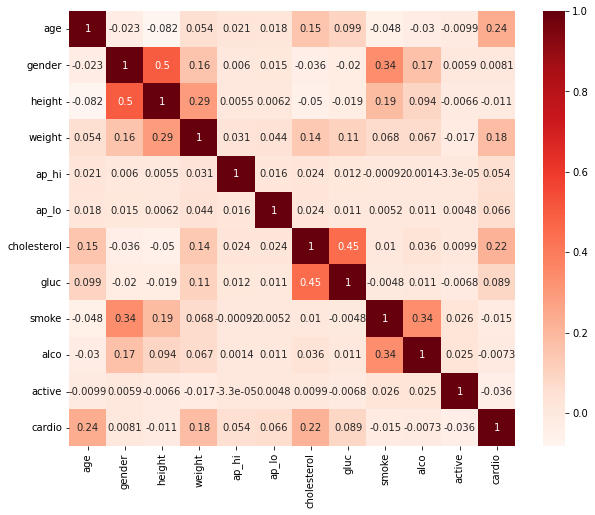

In [ ]:
plt.figure(figsize=(10,8))

cor = cardio_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### iii. Data Pre-processing

Below we first get the X and y, which are data and labels, respectively. 

In [ ]:
X = cardio_df.iloc[:, :-1]
y = cardio_df.iloc[:, -1:].values

X.shape, y.shape

((70000, 11), (70000, 1))

Then perform the train-test split, as previously. 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 12, stratify = y)

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (56000, 11)
Validation set shape: (14000, 11)


In [ ]:
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']         # columns with numerical value type

scaler = MinMaxScaler().fit(X_train[columns])
X_train[columns] = scaler.transform(X_train[columns])
X_val[columns] = scaler.transform(X_val[columns])

#### iv. Model Training (Adaboost)

First define a function for plotting predictive accuracy. As you will see soon, this function will be called and used later. 

In [ ]:
def plot_model(feature):
    plt.figure(figsize = (8, 5))
    plt.plot(df[feature], df['Training Accuracy'], label = 'Training Accuracy')
    plt.plot(df[feature], df['Validation Accuracy'], label = 'Validation Accuracy')
    plt.xlabel(feature)
    plt.ylabel('Accuracy')
    plt.legend()

##### **Step 1: Tuning The AdaBoost Classifier**

For illustrative purpose, here we only tune the number of Decision Tree models used for iterative training (i.e., n_estimators). We give a range of values from 1 to 500 for this parameter and see how it performs as the number of decision-tree models used in training increases. 

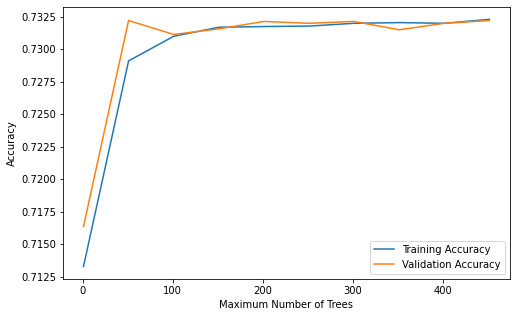

In [ ]:
def tune_adaboost(target_feature_value, **params):
    boost_model = AdaBoostClassifier(**params).fit(X_train, y_train)
    train_pred = boost_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    val_pred = boost_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)

    return target_feature_value, train_accuracy, val_accuracy


# Exploring the n_estimators
trees = np.arange(1,501,50)      
df = pd.DataFrame([tune_adaboost(target_feature_value = i,
                                 base_estimator = None,
                                 n_estimators = i,
                                 learning_rate = 0.6, 
                                 random_state = 12) for i in trees], 
                  columns = ['Maximum Number of Trees', 'Training Accuracy', 'Validation Accuracy'])

plot_model('Maximum Number of Trees')

As you can see from the plot above, the validation accuracy appears to be the highest when the max number of trees is around 200. Hence, in the next part, we will set n_estimators = 200. 

##### **Step 2: Pass in The Optimal Parameter Values**

In [ ]:
# Creating classifier 
ada = ensemble.AdaBoostClassifier(base_estimator = None,
                                 n_estimators = 200,
                                 learning_rate = 0.6,
                                 random_state = 12)           

#Fitting the classifier to training data
ada.fit(X_train,y_train)

# Making Predictions
ada_pred = ada.predict(X_val)

print("Training Score:%f"%ada.score(X_train,y_train))
print("Testing Score:%f"%ada.score(X_val,y_val))

Training Score:0.731750
Testing Score:0.732143


Okay, not bad - the Adaboost model achieved a test score of 0.732143 on the data set with outliers. 

In [ ]:
print(classification_report(y_val, ada_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      7004
           1       0.77      0.66      0.71      6996

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



#### v. Model Training (Random Forest)

##### Step 1: Tuning the Random Forest Classifier

Having tuned the Adaboost model before, now let's try tuning the random forest model below. In this case, for simplicity, we will only tune the max_depth parameter, while leaving others unchanged (i.e., max_samples=0.6, max_features = 'sqrt', criterion="gini", etc). Regarding the max_depth parameter, we will explore a range of values from 1 to 12 and see how the model accuracy varies. 

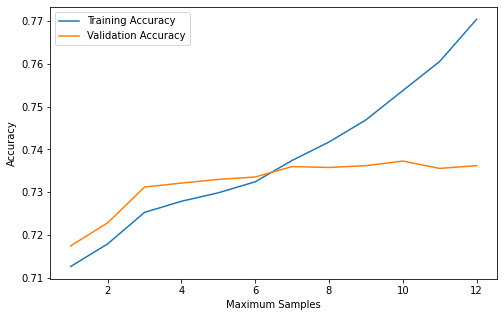

In [ ]:
def tune_random_forest(target_feature_value, **params):
    rf_model = RandomForestClassifier(**params).fit(X_train, y_train)
    train_pred = rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    val_pred = rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)

    return target_feature_value, train_accuracy, val_accuracy


# Exploring the number of samples
df = pd.DataFrame([tune_random_forest(target_feature_value = i,
                                      criterion = 'gini',
                                      max_depth = i,
                                      max_features = 'sqrt',
                                      max_samples = 0.6,
                                      random_state = 12) for i in np.arange(1, 13, 1)], 
                  columns = ['Maximum Samples', 'Training Accuracy', 'Validation Accuracy'])

plot_model('Maximum Samples')

As shown above, the optimal max_depth value appears to be around 10, which we will use for the next step below. 

##### **Step 2: Pass in The Optimal Parameter Values**

In [ ]:
# Initializing Classifier 
rf = ensemble.RandomForestClassifier(criterion = 'gini',
                                      max_depth = 10,
                                      max_features = 'sqrt',
                                      max_samples = 0.6,
                                      random_state = 12)

# Fitting the classifier to training data
rf.fit(X_train,y_train)

# Making Predictions
rf_pred = rf.predict(X_val)

print("Traing Score:%f"%rf.score(X_train,y_train))
print("Testing Score:%f"%rf.score(X_val,y_val))

Traing Score:0.753732
Testing Score:0.737286


In [ ]:
print(classification_report(y_val,rf_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7004
           1       0.77      0.68      0.72      6996

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



#### vi. Summary for Adaboost and Random Forest on data with outliers. 

As you can see, compared to Adaboost's prediction, the random forest prediction obtained a higher validation accuracy score (0.737286 v.s. 0.732143 from Adaboost).

This result is reasonable, since from the previous tutorial, we have learned that Adaboost tends to perform less well on data set with outliers (i.e. noises). On the other hand, random forest is more resistant to noises in data set.

### Data without Outliers

Well, random forest model beats Adaboost in the noisy data set, but will this continue to be the case for data without outliers? Let's see ! 

#### i. Exploratory Data Analysis

Here, we filter out the outlier points that have z-score greater than 3 (after taking the absolute value).  

In [ ]:
# A data point can be considered unusual if its z-score is above 3 or below −3 .
filtered_df = cardio_df[(np.abs(stats.zscore(cardio_df)) < 3).all(axis=1)]
filtered_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69992,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
filtered_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,55699.000000,55699.000000,55699.000000,55699.000000,55699.000000,55699.000000,55699.000000,55699.000000,55699.0,55699.0,55699.000000,55699.000000
mean,19438.396111,1.294206,163.892476,72.919929,125.643656,81.011077,1.270148,1.075944,0.0,0.0,0.799494,0.484838
std,2470.850752,0.455689,7.566255,13.016990,17.752886,10.207992,0.576480,0.264911,0.0,0.0,0.400383,0.499775
min,14282.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000
25%,17623.000000,1.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000
50%,19680.000000,1.000000,164.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000
75%,21308.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,309.000000,602.000000,3.000000,2.000000,0.0,0.0,1.000000,1.000000


#### ii. Correlation / Heatmap

Again, generate the heatmap for the filtered data set. 

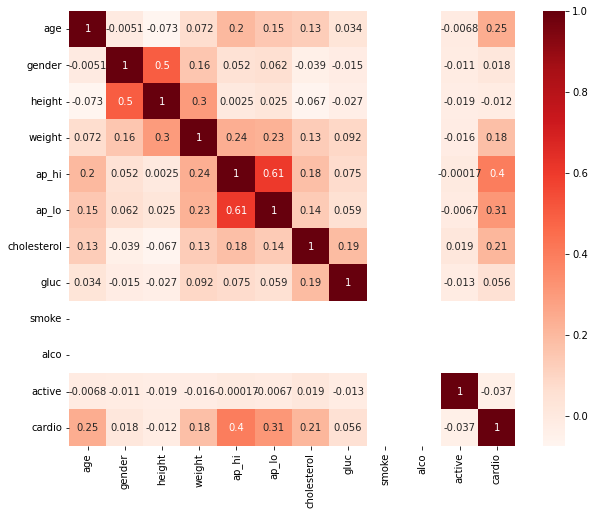

In [ ]:
plt.figure(figsize=(10,8))

cor = filtered_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### iii. Data Pre-processing

In [ ]:
X = filtered_df.iloc[:, :-1]
y = filtered_df.iloc[:, -1:].values

X.shape, y.shape

((55699, 11), (55699, 1))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 12, stratify = y)

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (44559, 11)
Validation set shape: (11140, 11)


In [ ]:
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']         # columns with numerical value type

scaler = MinMaxScaler().fit(X_train[columns])
X_train[columns] = scaler.transform(X_train[columns])
X_val[columns] = scaler.transform(X_val[columns])

#### iv. Model Training (Adaboost)

The similar procedure goes for the model training on data set without outliers. 

##### **Step 1: Tuning The Adaboost Classifier**

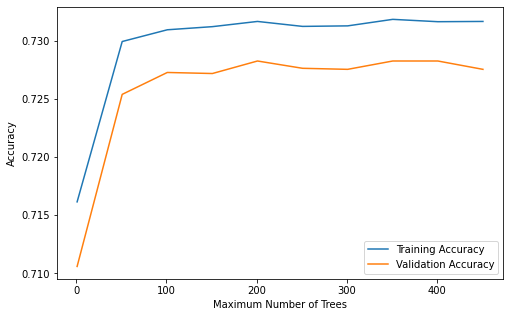

In [ ]:
def tune_adaboost(target_feature_value, **params):
    boost_model = AdaBoostClassifier(**params).fit(X_train, y_train)
    train_pred = boost_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    val_pred = boost_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)

    return target_feature_value, train_accuracy, val_accuracy


# Exploring n_estimators
trees = np.arange(1,501,50)
df = pd.DataFrame([tune_adaboost(target_feature_value = i,
                                 base_estimator = None,
                                 n_estimators = i,
                                 learning_rate = 0.6,
                                 random_state = 12) for i in trees], 
                  columns = ['Maximum Number of Trees', 'Training Accuracy', 'Validation Accuracy'])

plot_model('Maximum Number of Trees')

As seen above, the optimal n_estimator seems to be around 400.

##### **Step 2: Pass in The Optimal Parameter Values**

In [ ]:
# Creating classifier 
ada = ensemble.AdaBoostClassifier(base_estimator = None,
                                 n_estimators = 400,
                                 learning_rate = 0.6, 
                                 random_state = 12)           
#Fitting classifier to training data
ada.fit(X_train,y_train)

# Making Predictions
ada_pred = ada.predict(X_val)

print("Training Score:%f"%ada.score(X_train,y_train))
print("Testing Score:%f"%ada.score(X_val,y_val))

Training Score:0.731704
Testing Score:0.728276


In [ ]:
print(classification_report(y_val,ada_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      5739
           1       0.77      0.63      0.69      5401

    accuracy                           0.73     11140
   macro avg       0.73      0.73      0.72     11140
weighted avg       0.73      0.73      0.73     11140



#### v. Model Training (Random Forest)

##### **Step 1: Tuning the Random Forest Classifier**

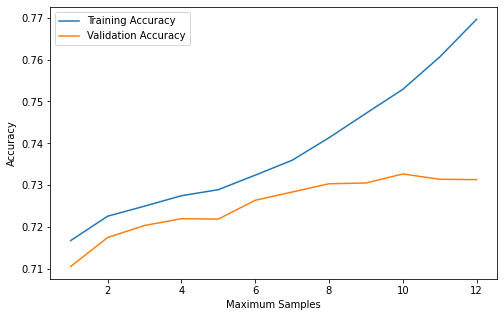

In [ ]:
def tune_random_forest(target_feature_value, **params):
    rf_model = RandomForestClassifier(**params).fit(X_train, y_train)
    train_pred = rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    val_pred = rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)

    return target_feature_value, train_accuracy, val_accuracy


# Exploring number of samples
df = pd.DataFrame([tune_random_forest(target_feature_value = i,
                                      criterion = 'gini',
                                      max_depth = i,
                                      max_features = 'sqrt',
                                      max_samples = 0.6,
                                      random_state = 12) for i in np.arange(1, 13, 1)], 
                  columns = ['Maximum Samples', 'Training Accuracy', 'Validation Accuracy'])

plot_model('Maximum Samples')

As seen above, the optimal max_depth is around 12, which we will use below.

##### **Step 2: Pass in The Optimal Parameter Values**

In [ ]:
# Initializing Classifier 
rf = ensemble.RandomForestClassifier( criterion = 'gini',
                                      max_depth = 10,
                                      max_features = 'sqrt',
                                      max_samples = 0.6,
                                      random_state = 12)
# Fitting classifier to training data
rf.fit(X_train,y_train)

# Making Predictions
rf_pred = rf.predict(X_val)

print("Traing Score:%f"%rf.score(X_train,y_train))
print("Testing Score:%f"%rf.score(X_val,y_val))

Traing Score:0.752889
Testing Score:0.732675


In [ ]:
print(classification_report(y_val,rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      5739
           1       0.75      0.67      0.71      5401

    accuracy                           0.73     11140
   macro avg       0.74      0.73      0.73     11140
weighted avg       0.73      0.73      0.73     11140



#### vi. Summary for Adaboost and Random Forest on data without outliers. 

On the data set without outliers, it seems that random forest still trumps Adaboost, with a testing score of 0.732675 greater than 0.728276 from Adaboost. In this light, outlier is not the only factor that's affecting the model performance, and there are many other factors that are also worth looking into. 

Generally speaking, regardless of whether or not outliers are included, it seems that random forest tends to perform better than Adaboost in this particular cardiovascular data set. 


## IV. Conclusion

Congratulations! You made it to the end of this tutorial. Let's again summarize the advantages and disadvantages of Adaboost compared to Random Forest after introducing to you the mathematical background, building models for simulated data, and applying these models on a real-world dataset:

<br>

- **Advantages**: Adaboost is good at boosting the performances of weak learners such as the default Decision Tree model, combining the results of all the weak learners using weighted values and converting to a strong learner. When the dataset is clean and well organized, Adaboost will tend to perform well. Also, as you may notice, Adaboost requires minimal amount of hypertuning - there are only two important parameters, so you can tune the model fairly quickly. On the other hand, although Random Forest can often yield better accuracy than Adaboost, you do need to tune many parameters in order to get the better results, which can be time consuming. 

- **Disadvantages**: As we have seen in the simulation part, Adaboost is probably not the best choice when the data has noise and outliers. It is robust to correlated predictors, but Random Forest can often do a better job.  

<br>

Overall, the choice between AdaBoost and Random Forest will depend on the details of the task you have. The parameters you tune for your model are crucial for the final model accuracy. **It may be helpful to try out both methods and compare their performance to determine which one is a better suit to your needs.** 

<br>

This concludes our tutorial on introducing Adaboost and Random Forest. We hope that you enjoy this tutorial when you can learn the material as well as writing some your own code during the reading and find this tutorial useful. Let us know if you have any feedbacks or questions!

## V. Summary of Contribution

- **Henry Cui**: Responsible for Random Forest Simulation

<br>

- **Derek Fu**: Responsible for Adaboost Simulation, Conclusion, & General Formatting  

<br>

- **James Li**: Responsible for Mathematical Background

<br>

- **Vincent Wu**: Responsible for Real-World Application

## VI. References

#### Mathematical Background part

1. James, G., Witten, D., Hastie, T., &amp; Tibshirani, R. (2021). $\textit{An introduction to statistical learning: With applications in R}$ (Second). Springer. 
2. Eric Chi. $\textit{Introduction to Statistical Machine Learning}$. 2022

#### Simulation part

3. https://pandas.pydata.org/

4. https://numpy.org/

5. https://scikit-learn.org/stable/

6. https://matplotlib.org/

7. https://github.com/python/cpython/blob/3.11/Lib/random.py

#### Data part

8. https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset